In [1]:
import sys
sys.path.insert(1, "../python/architecture")
sys.path.insert(2, "../python/functions")

In [2]:
from model_functions import nn_load
from plotting_functions import nn_plot_acc, nn_plot_acc_many
import reproducible
import no_gpu

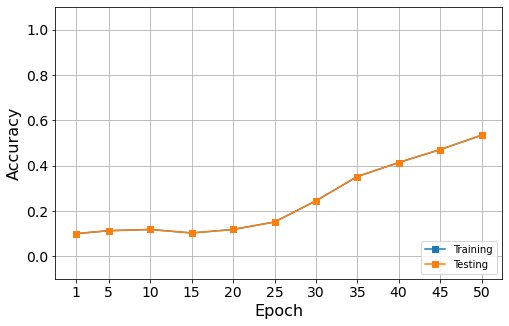

In [3]:
model = nn_load("../models/mnist/mnist_enkf_full_E50_B60000_P500_H2.h5")
nn_plot_acc(model,
            mean_comparison = None,
            start_epoch = 1,
            tick_diff = 5,
            marker = True,
            at_tick = True,
            save = None)#"../img/mnist/mnist_enkf_E50_B60000.png")

In [4]:
model_batches_dict = {}
batches = [1000, 2000, 5000, 10000, 30000, 60000]

for b in batches:
    model_batches_dict["batch_size: {}".format(b)] = nn_load("../models/mnist/mnist_enkf_full_E20_B{}_P500_H2.h5".format(b))

In [5]:
for key, value in model_batches_dict.items():
    model_batches_dict[key].history["a"] = {}
    model_batches_dict[key].history["b"] = {}

In [6]:
model_batches_dict["batch_size: 1000"].history

{'accuracy': array([0.47116667, 0.61901665, 0.65936667, 0.6831333 , 0.69641668,
        0.70528334, 0.71004999, 0.71411669, 0.71746665, 0.72070003,
        0.72364998, 0.72595   , 0.72813332, 0.73000002, 0.73145002,
        0.73299998, 0.73414999, 0.73543334, 0.73671669, 0.73785001]),
 'val_accuracy': array([0.4804    , 0.6261    , 0.66439998, 0.69120002, 0.70490003,
        0.71280003, 0.71810001, 0.72240001, 0.7245    , 0.72729999,
        0.72970003, 0.73180002, 0.73329997, 0.73509997, 0.73559999,
        0.736     , 0.73790002, 0.73900002, 0.74070001, 0.74199998]),
 'a': {},
 'b': {}}

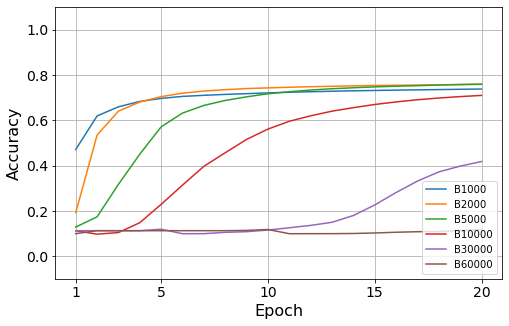

In [7]:
model_batches_list = list(model_batches_dict.values())
label_batches_list = ["B{}".format(list(model_batches_dict.keys())[i].split(": ")[1]) for i in range(len(model_batches_dict))]

nn_plot_acc_many(model_batches_list,
                 label_batches_list,
                 train_test = "train",
                 mean_comparison = None,
                 start_epoch = 1,
                 tick_diff = 5,
                 save = "../img/mnist/mnist_enkf_batches_E50.png")

In [8]:
model_particles_dict = {}
particles = [100, 200, 500]

for p in particles:
    model_particles_dict["batch_size: {}".format(p)] = nn_load("../models/mnist/mnist_enkf_full_E20_B5000_P{}_H2.h5".format(p))

In [9]:
for key, value in model_particles_dict.items():
    model_particles_dict[key].history["a"] = {}
    model_particles_dict[key].history["b"] = {}

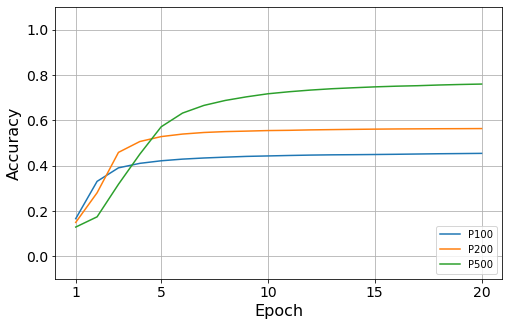

In [10]:
model_particles_list = list(model_particles_dict.values())
label_particles_list = ["P{}".format(list(model_particles_dict.keys())[i].split(": ")[1]) for i in range(len(model_particles_dict))]

nn_plot_acc_many(model_particles_list,
                 label_particles_list,
                 train_test = "train",
                 mean_comparison = None,
                 start_epoch = 1,
                 tick_diff = 5,
                 save = None)#"../img/mnist/mnist_enkf_particles_E20.png")